Mudasir Ahmad Pandith

mudasirpandith789@gmial.com

# Predicting heart disease using ML
This notebook looks into using various python based ml and
 data sceince libraries in an attempt to build a ml model capable of 
 predicting whether or no
t some has heart disease based on thier medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
## 1. Problem Definition

In a statement .
> Given clinical parameters about a patient , can we predict whether he has disease or not?

## 2. Data
 * csv file
## 3. Evaluation
> If we reach 95% accuracy at predicting , we`ll pirsue the project.
## 4. Features
 This is where you will get information about data
 
  

### Preparing the tools

In [174]:
# Import All Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
'%matplotlib inline' 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score ,f1_score
from sklearn.metrics import plot_roc_curve

## Load the data

In [175]:
df= pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset ypu re working
1. What questions are you trying to solve?
2. Waht kind of data do we have and how do we treat differebt types?
3. Whats missing from the data and how  do you deal with it?
4. Where arae the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of ur data?

In [176]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [177]:
# Lets find how many of each class are there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

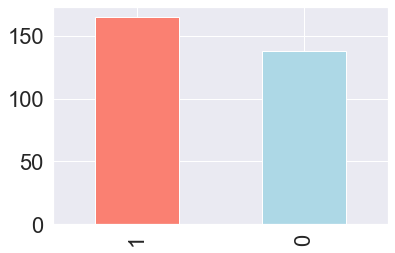

In [178]:
from cProfile import label


df['target'].value_counts().plot(kind="bar", color=['salmon','lightblue'])

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [180]:
# are there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [181]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [182]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [183]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


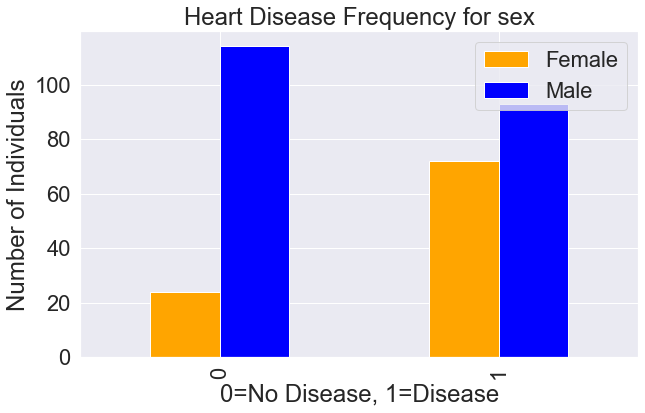

In [184]:
# Create a plot od crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['orange', 'blue'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Number of Individuals")
plt.legend(["Female",'Male'])

## Age vs Max Heart Rate for Heart Disease

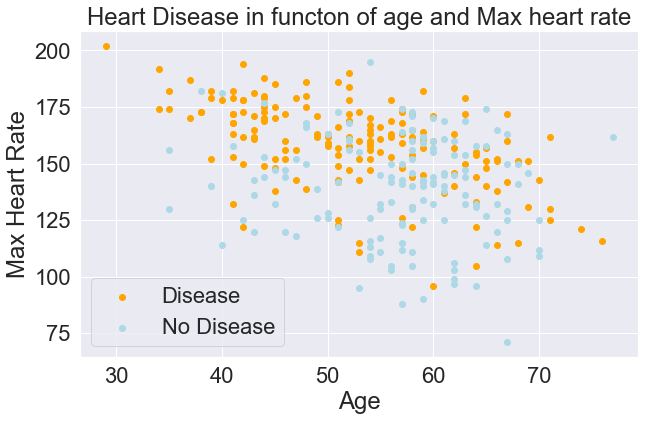

In [185]:
# create another figure
plt.figure(figsize=(10,6))
# Sacatter with position examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],
c="orange"
)
# Scatter with negative example
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0],
            c="lightblue"
            )
#Add Some helpful info
plt.title('Heart Disease in functon of age and Max heart rate')
plt.xlabel('Age')
plt.ylabel("Max Heart Rate")
plt.legend(['Disease', 'No Disease']);

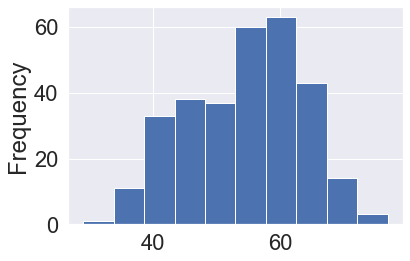

In [186]:
# Check the distribution of the age with histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain type

In [187]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


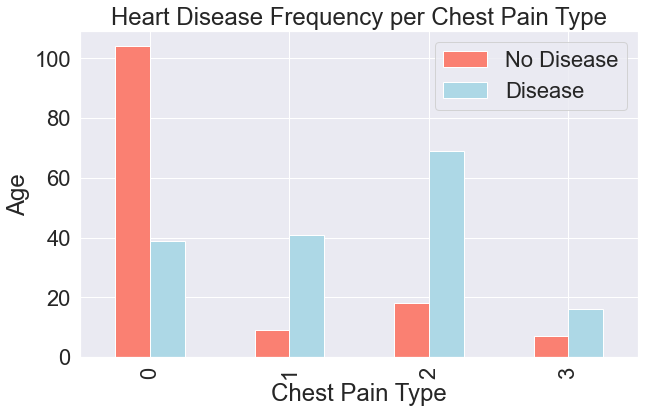

In [188]:
# Make crosstab more visual
from turtle import color


pd.crosstab(df.cp,df.target).plot(kind='bar',
figsize=(10,6),
color=['salmon','lightblue'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel("Age")
plt.legend(['No Disease', 'Disease']);


In [189]:
# Make a correlation metrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


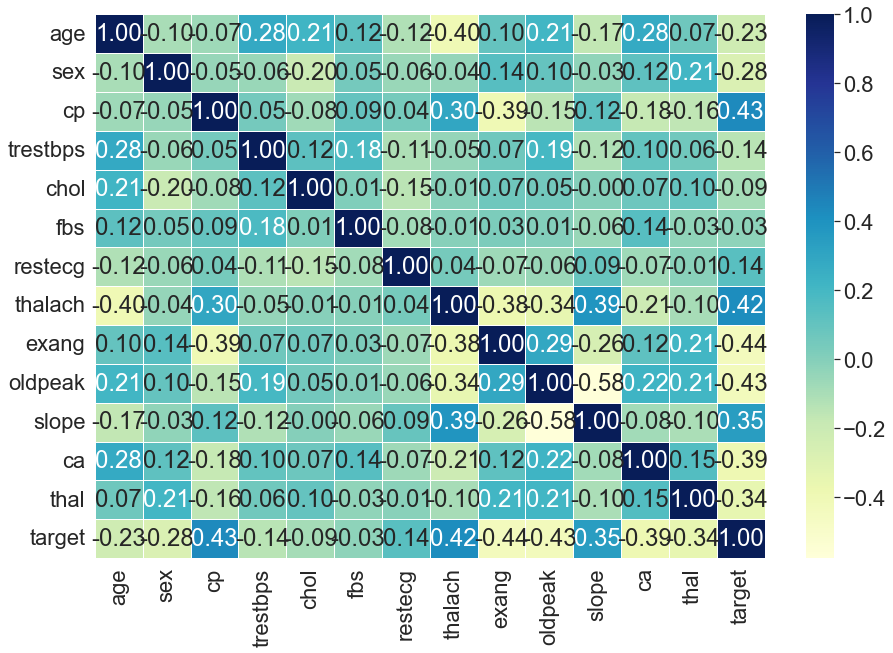

In [190]:
## lets make our correlation matrix colorfull
corr_matrix=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
annot=True,
linewidths=.5,
fmt=".2f",
cmap='YlGnBu'
);


## 5. Modelling

In [191]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [192]:
# split the data into x and y
np.random.seed(42)
x= df.drop('target', axis=1)
y=df['target']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.2)


We are going to use 3 ML models:
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier

In [193]:
# Put models in a dictionary
models={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
 }
 #Create a functio to fit and score models
def fit_and_score(models, x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    #Make a dictionary to keep  models
    # Loop thorugh models
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [194]:
model_score=fit_and_score(models,x_train,x_test,y_train,y_test);
model_score

c:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

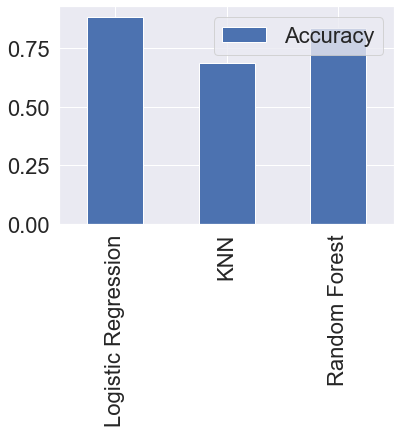

In [195]:
model_compare=pd.DataFrame(model_score,index=['Accuracy'])
model_compare.T.plot.bar();

Now we have got a basline model...  and we know a modes firsr predictions arent always what we should be based our next steps off.
What should do?
Lets look at the following:
 * Hyperparamter tunning
 * Feature importance
 * Confusion matrix
 * cross- validation
 * Precision
 * recall
 * Classification report
 * ROC curve
 * Area under the curve (AUC)

###  Hyperparamter tunning


In [196]:
#lets tune KNN
train_score=[]
test_score=[]
# create a list of differnt values  for n_neighbors
neighbors= range(1,21)
# Setup KNN instance
knn= KNeighborsClassifier()

#lOOP
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Upadte the trainning score list
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))


In [197]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [198]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximium KNN score on the test data : 75.41%


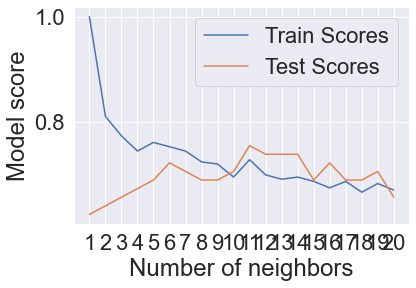

In [199]:
plt.plot(neighbors, train_score, label='Train Scores')
plt.plot(neighbors, test_score, label='Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();
print(f"Maximium KNN score on the test data : {max(test_score)*100:.2f}%")

###  Hyperparamter tunning with RandomisedSearchCV
we are going to tune
* LogisticRegression()
* RandomForestClassifier()

...RandomisedSearchCV


In [200]:
# Create a  Hyperparamter grid fro logisticRegression()
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"],
}
# create  Hyperparamter grid for RandomForestClasifier()
rf_grid={
    "n_estimators":np.arange(10,1000,500),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}


In [201]:
# Tuning LogisticRegressor
np.random.seed(42)
# set Random Randomised 
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
param_distributions=log_reg_grid,
cv=5,
n_iter=20,
verbose=True
)
# Fit random hyperparamters seracg model for logisticRegressor
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [202]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [203]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [204]:
# Tuning 
np.random.seed(42)
# set Random Randomised 
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
param_distributions=rf_grid,
cv=5,
n_iter=20,
verbose=True
)
# Fit random hyperparamters seracg model for 
rs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [ ]:
rs_rf.score(x_test,y_test)

0.8360655737704918

In [ ]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparamters tunning with GridSarchCV


In [ ]:
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver":['liblinear'],

}
gs_log_reg= GridSearchCV(LogisticRegression(),
                param_grid=log_reg_grid,
                cv=5,
                verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid Search
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## evaluating our Ml Classifiers, beyong acuarcy:
* ROC curve and AUC score 
* Confusion matrix
* Classification report
* Precision  
* Recall 
* F1 score 


In [ ]:
y_preds=gs_log_reg.predict(x_test)

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


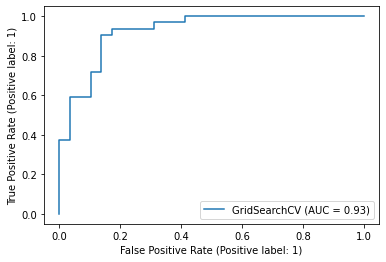

In [ ]:
# plot ROC curve and calculate AUC score 
plot_roc_curve(gs_log_reg,x_test,y_test);

In [ ]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


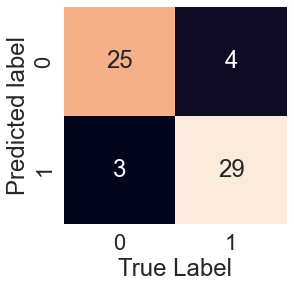

In [ ]:
# make it more visual
sns.set(font_scale=2)
def plot_conf_mat(y_test, y_preds):
    fig,ax =plt.subplots(figsize=(4,4))
    ax= sns.heatmap(confusion_matrix(y_test,y_preds),
    annot=True,
    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel('Predicted label')
plot_conf_mat(y_test,y_preds)


In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Feature importance
mean whuch feature contributes more to outcome

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [ ]:
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775125744686,
 'sex': -0.8604462617531493,
 'cp': 0.6606705112737149,
 'trestbps': -0.011569930915493508,
 'chol': -0.0016637441846093658,
 'fbs': 0.04386114942757081,
 'restecg': 0.3127582620910283,
 'thalach': 0.02459361246994142,
 'exang': -0.6041306524707951,
 'oldpeak': -0.568628196677622,
 'slope': 0.4505162332451247,
 'ca': -0.636098853689775,
 'thal': -0.6766337271477075}

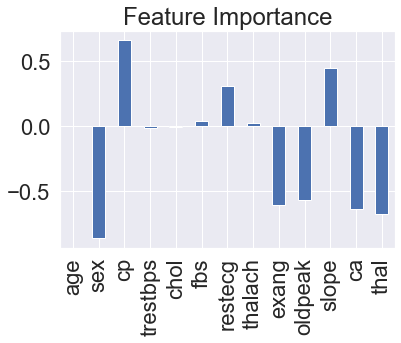

In [ ]:
features_df= pd.DataFrame(feature_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);


## 6. experimentation
If you havnt hit your evaluation metric yet ... ask your self....
* Could yu collect more data?
* Could you try a better model? Like catBooost or XGBoost
* Could you improve the currrent models?
* If your model is good enough how can we share it

